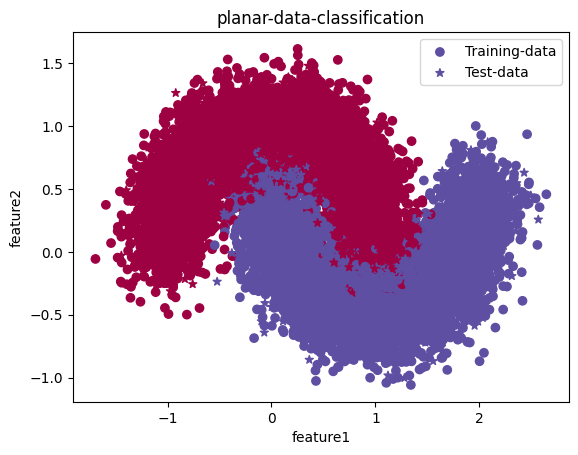

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
def initialize_parameters(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b 
def tanh(z):
    return np.tanh(z)
def propogate(w,b,x,y):
    m=x.shape[1]
    A=tanh(np.dot(w.T,x)+b)
    cost=-1/m*np.sum(y*np.log(A)+(y-1)*np.log(1-A))
    dw=1/m*np.dot(x,(A-Y).T)
    db=1/m*np.sum(A-y)
    cost=np.squeeze(cost)
    grads={'dw':dw,'db':db}
    return grads,cost 
def optimize(w,b,num_iterations,learning_rate,print_cost=True):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,x,y)
        dw=grads['dw']
        db=grads['db']
        w-=learning_rate*dw
        b-=learning_rate*db
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("Cost after iteration %i: %f" %(i,cost))
    params={'w':w,'b':b}
    grads={'dw': dw,'db':db}
    return params,grads,costs
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_parameters(X_train.shape[0])
    parameters,_,cost= optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w,b=parameters['w'],parameters['b']
    return {"costs": costs,"w": w,"b": b,"learning_rate": learning_rate,"num_iterations": num_iterations}
x_train,y_train=make_moons(n_samples=10000,noise=0.2,random_state=42)
x_test,y_test=make_moons(n_samples=1000,noise=0.2,random_state=42)
y_train=y_train.reshape(1,-1)
y_test=y_test.reshape(1,-1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.squeeze(),cmap=plt.cm.Spectral,label='Training-data')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test.squeeze(),marker='*',cmap=plt.cm.Spectral,label='Test-data')          
plt.title('planar-data-classification')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.show()
